### Exercise 
In this file using following columns build a model to predict if person would survive or not,<br>
Pclass<br>
Sex<br>
Age<br>
Fare<br>
Calculate score of your mode

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

#### Data pre-processing

In [59]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [61]:
df.Sex.replace(to_replace=['male', 'female'], value=[1,0], inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [62]:
df.shape

(891, 5)

In [63]:
df.tail()

,Pclass,Sex,Age,Fare,Survived
886,2,1,27.0,13.00,0
887,1,0,19.0,30.00,1
888,3,0,NaN,23.45,0
889,1,1,26.0,30.00,1
890,3,1,32.0,7.75,0


In [64]:
df.columns[df.isna().any()]

Index(['Age'], dtype='object')

In [65]:
df.Age.isnull().sum()

177

In [69]:
# Handling the missing values by replacing it with the Age mean
age_mean = round(df.Age.mean())
age_mean

30

In [70]:
df.fillna(age_mean, inplace=True)
df.Age.isnull().sum()

0

In [71]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [72]:
df.shape

(891, 5)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [74]:
df.describe()

,Pclass,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.758889,32.204208,0.383838
std,0.836071,0.477990,13.002570,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.910400,0.000000
50%,3.000000,1.000000,30.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


In [136]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [75]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [76]:
df.corr()

,Pclass,Sex,Age,Fare,Survived
Pclass,1.000000,0.131900,-0.329727,-0.549500,-0.338481
Sex,0.131900,1.000000,0.084660,-0.182333,-0.543351
Age,-0.329727,0.084660,1.000000,0.090632,-0.070657
Fare,-0.549500,-0.182333,0.090632,1.000000,0.257307
Survived,-0.338481,-0.543351,-0.070657,0.257307,1.000000


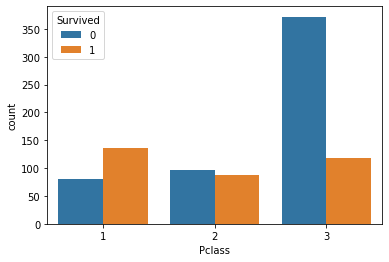

In [77]:
sns.countplot(x='Pclass', hue='Survived', data=df);

#### Assign Features and target variables

In [78]:
X = df.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [79]:
y = df.Survived

#### Spliting the data to Training and Testing Data

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)

#### Bulding and training the descision tree model

In [132]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Accuracy of the model

In [133]:
model.score(X_test, y_test)

0.852017937219731

#### Save the model

In [134]:
joblib.dump(model, 'Titanic Survived Prediction')

['Titanic Survived Prediction']

#### Load the model

In [135]:
mj = joblib.load('Titanic Survived Prediction')

#### using the model after loading it

In [138]:
mj.predict([[2,1,22.0,50.45]])

array([0], dtype=int64)

In [139]:
mj.predict([[3,1,27.0,70.45]])

array([1], dtype=int64)